In [1]:
from bertopic import BERTopic
from src.embedder import LatinEmbedder
from sklearn.feature_extraction.text import CountVectorizer
from cltk.stops.words import Stops
from cltk.tokenizers.lat.lat import LatinWordTokenizer
from cltk.lemmatize.lat import LatinBackoffLemmatizer
from tqdm.notebook import tqdm
from src.embedder import load_document_embeddings
from src.corpus import load_corpus, download_corpus
import pandas as pd


documents = load_corpus()

# We've already created document embeddings, so load those
embeddings = load_document_embeddings(documents, 'src/doc_embeddings_all.npy')
documents = [doc for doc in documents if not not embeddings[doc[1]].any()]

# Get dates and filter those without
dates = pd.read_csv('LatLibDates-Filtered.csv')
documents_with_dates = []
all_dates = []

for doc in documents:
    title = doc[0][39:] # Chop off the file name
    if (dates['V1'] == title).any():
        date = dates[dates['V1'] == title].values[0][1]
        if date <= 13:
            # Convert the integer to the actual year, using negative numbers for BC
            date = -700 + date * 100
            all_dates.append(date)
            documents_with_dates.append(doc)
    else:
        print(f"Couldn't find {title}")

# Tokenize and lemmatize
tokenizer = LatinWordTokenizer()
lemmatizer = LatinBackoffLemmatizer()

tokenized_documents = []
tokenized_embedding_map = dict()
for document in tqdm(documents_with_dates):
    tokenized = [lemma[1] for lemma in lemmatizer.lemmatize(tokenizer.tokenize(document[1]))]
    tokenized = ' '.join(tokenized)
    tokenized_documents.append(tokenized)
    tokenized_embedding_map[tokenized] = embeddings[document[1]]

Loading corpus...
Loaded 2141 texts.
Couldn't find epistaustras.txt
Couldn't find asserius.txt
Couldn't find appverg.catalepton.txt
Couldn't find xanten.txt
Couldn't find fragmentumlaurentianum.txt
Couldn't find dares1.txt
Couldn't find inscriptions.txt
Couldn't find appvergculex.txt
Couldn't find epitaphs.txt
Couldn't find cato.dis.txt
Couldn't find pulchracomis.txt
Couldn't find hymni.txt
Couldn't find baldo.txt
Couldn't find columba2.txt
Couldn't find diravi.txt
Couldn't find lucernarium.txt
Couldn't find appvergcomp.txt
Couldn't find carmenarvale.txt
Couldn't find columba1.txt
Couldn't find valesianus1.txt
Couldn't find index.txt
Couldn't find nivis.txt
Couldn't find carmensaliare.txt
Couldn't find dares.txt
Couldn't find appverg.aetna.txt
Couldn't find valesianus2.txt
Couldn't find appverg.ciris.txt
Couldn't find liberpontificalis1.txt
Couldn't find indices.txt
Couldn't find walton.txt
Couldn't find creeds.txt
Couldn't find donation.txt
Couldn't find precatio.txt
Couldn't find cae

  0%|          | 0/1349 [00:00<?, ?it/s]

In [2]:
vectorizer = CountVectorizer(
    stop_words=Stops(iso_code='lat').stops + ['punc', 'quod', 'se', 'sunt', 'esse', 'tibi', 'mihi', 'te', 'quid', 'me', 'hoc', 'cum2', 'meus', 'tuus', 'the', 'ejus', 'dig', 'iste', 'nunc', 'ed', 'ch', 'vel', 'cj', 'aa', 'pp', 'cth']
)

topic_model = BERTopic(
    embedding_model=LatinEmbedder(document_embeddings=tokenized_embedding_map),
    vectorizer_model=vectorizer,
    verbose=True
)

# Fit a static topic model first
topics, probs = topic_model.fit_transform(tokenized_documents)
topic_model.get_topic_info()

Embedding: populus


,Topic,Count,Name
0,-1,93,-1_dico_omnis_res_facio
1,0,265,0_fero_do_os_manus
2,1,116,1_deus_homo_dico_christus
3,2,65,2_bellum_romanus_urbs_rex
4,3,59,3_res_publicus_omnis_homo
5,4,47,4_romanus_consul_hostis_bellum
6,5,42,5_bonus_animus_malus_nihil
7,6,41,6_periocha_livy_consul_urbe
8,7,41,7_deus_dico_dominus_facio
9,8,36,8_dico_orator_verbum_genus


In [20]:
# View representative documents for some topic
[d[:100] for d in topic_model.get_representative_docs(topic=3)]

['Cicero punc In Verres2 II.1 ACTIONIS IN C. VERREM SECVNDAE LIBER PRIMVS punc 1 punc Neminem vester i',
 'DE DOMO SVA M. TVLLI CICERONIS DE DOMO SVA AD PONTIFICES ORATIO 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ',
 'Cicero punc Pro Sestius M. TVLLI CICERONIS PRO P. SESTIO ORATIO I II III IV V VI VII VIII IX X XI XI']

In [7]:
# See the top words for a topic
topic_model.get_topic(4)

[('romanus', 0.029281585819626813),
 ('consul', 0.027403268405957932),
 ('hostis', 0.022853483289526633),
 ('bellum', 0.019394399135165292),
 ('castrum', 0.017048396777344092),
 ('urbs', 0.01695497194186321),
 ('exercitus', 0.01588651064466642),
 ('miles', 0.01527096239218818),
 ('senatus', 0.01497913776826033),
 ('omnis', 0.014765670833436)]

In [ ]:
# See an overview of all documents
topic_model.get_document_info(tokenized_documents)

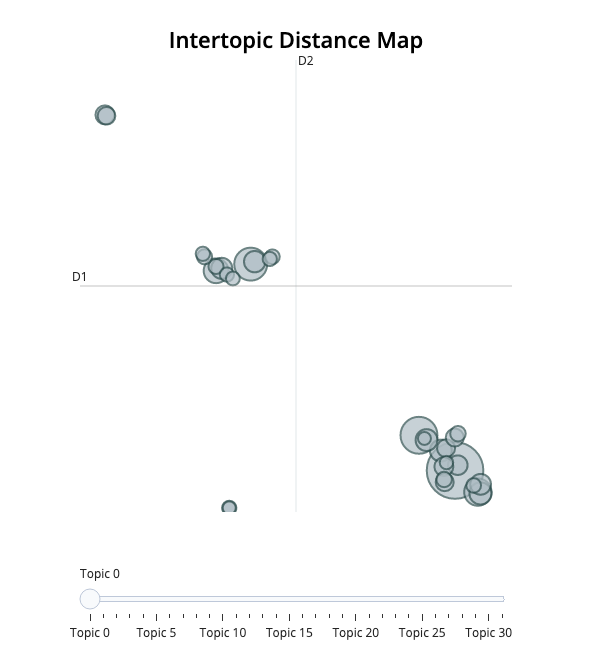

In [13]:
# Visualize topics (without time)
topic_model.visualize_topics()

In [ ]:
# Visualize topic hierarchy (without time)
topic_model.visualize_hierarchy()

In [15]:
# Fit the dynamic topic model, breaking dates into 20 bins
topics_over_time = topic_model.topics_over_time(tokenized_documents, all_dates, nr_bins=20)

18it [00:09,  1.89it/s]


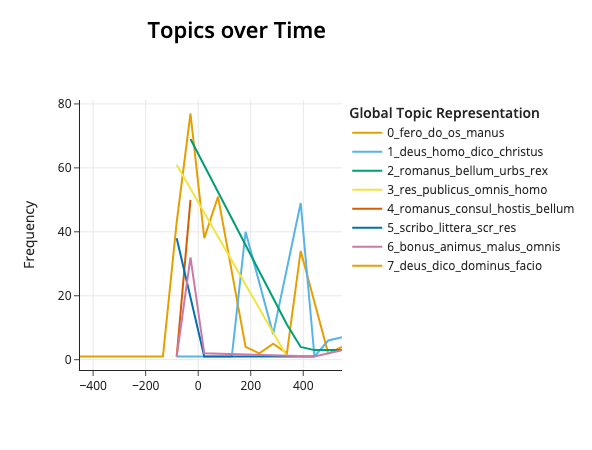

In [16]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=8)